<a href="https://colab.research.google.com/github/alitaspaul/DSP-LAB/blob/master/Experiment7_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPERIMENT-7

---



**Properties of DFT**

---


DATE: 29/08/2023

---


AIM:

Write a program to verify the following properties of DFT

i) Duality

ii) Multiplication

iii) Circular convolution

iv) Parseval’s theorem.

---



SOFTWARE USED:

Python


---


THEORY:

i. Duality property:

 Let us consider a signal x(n), whose DFT is given as X(k). Let the finite duration sequence be XNN. Then according to duality theorem,

  If, x(n)⟷X(K) => X(N)⟷Nx[((−k)) .

So, by using this theorem if we know DFT, we can easily find the finite duration sequence.

ii. Multiplication:

 If there are two signal x1(n) and x2(n) and their respective DFTs are X1(k) and X2(K), then multiplication of signals in time sequence corresponds to circular convolution of their DFTs.

 If, x1(n)⟷X1(K) & x2(n)⟷X2(K)

 then, x1(n) x x2(n)⟷X1(K)©X2(K) => Circular convolution


iii. Circular convolution:

 Circular convolution using Matrix method represents the two given sequence x1(n) and x2(n) in matrix form.

 One of the given sequences is repeated via circular shift of one sample at a time to form an N X N matrix.

 The other sequence is represented as column matrix.


 The multiplication of two matrices give the result of circular convolution.


iv. Parseval’s theorem:

The Parseval’s theorem expresses the energy of a signal in time-domain in terms of the average energy in its frequency components.

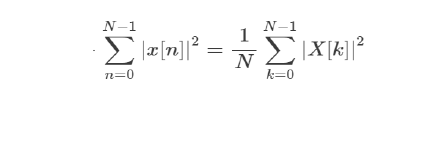

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#dft function to be used to prove the properties:
def dft(x,k):


  #output array
  y = np.zeros(k,dtype = 'complex') #because we need a complex matrix as output
  for i in range (k):
    sum = 0
    for m in range (k):
      sum += x[m]*np.exp(complex(-1j)*2*np.pi*i*m*float(1/k))
    y[i] = sum
  return y

In [49]:
#Duality Property : ax1 + bx2 = ay1 + by2
x1 = np.array(input("Enter the sequence of x1:").split(",")).astype(int)
x2 = np.array(input("Enter the sequence of x2:").split(",")).astype(int)
a = int(input("Enter the value of coefficient of a:"))
b = int(input("Enter the value of coefficient of b:"))

if len(x1)<len(x2):
  x1 = np.pad (x1, (0, len(x2-len(x1))))
elif len(x1)>len(x2):
  x2 = np.pad (x2, (0, len(x1-len(x2))))

k1 = len(x1) #size of the sequence
#lhs : ax1+bx2

xl1 = a*x1
xl2 = b*x2
X = xl1+xl2

lhs = dft(X,k1)
print("The value of DFT {ax1[n]+ax2[n]}: \n", lhs)

X1 = a*dft(x1,k1)
X2 = b*dft(x2,k1)
print("The value of DFT {ax1[n]} + DFT {ax2[n]}: \n", X1+X2)

print("Thus proved Linearity property of DFT.")






Enter the sequence of x1:1,2,3,4
Enter the sequence of x2:1,2,1,2
Enter the value of coefficient of a:3
Enter the value of coefficient of b:2
The value of DFT {ax1[n]+ax2[n]}: 
 [ 42.+0.00000000e+00j  -6.+6.00000000e+00j -10.-4.40872848e-15j
  -6.-6.00000000e+00j]
The value of DFT {ax1[n]} + DFT {ax2[n]}: 
 [ 42.+0.00000000e+00j  -6.+6.00000000e+00j -10.-4.40872848e-15j
  -6.-6.00000000e+00j]
Thus proved Linearity property of DFT.


In [55]:
#Multiplication : it is convolution in freq domain
x1 = np.array(input("Enter the sequence of x1:").split(",")).astype(int)
x2 = np.array(input("Enter the sequence of x2:").split(",")).astype(int)

if len(x1)<len(x2):
  x1 = np.pad (x1, (0, len(x2-len(x1))))
elif len(x1)>len(x2):
  x2 = np.pad (x2, (0, len(x1-len(x2))))

k = len(x1)

#lhs
X = x1*x2
print("The LHS of operation:\n",dft(X,k))

#rhs
X1 = dft(x1,k)
X2 = dft(x2,k)
y= np.fft.ifft(dft(X1,k)*dft(X2,k))/k; #stockholm method
print("The RHS of operation:\n",y)

print("Thus proved Multiplication property of DFT.")





Enter the sequence of x1:1,2,3,4
Enter the sequence of x2:5,6,7,8
The LHS of operation:
 [ 70.+0.00000000e+00j -16.+2.00000000e+01j -18.-8.08266887e-15j
 -16.-2.00000000e+01j]
The RHS of operation:
 [ 70.+9.71445147e-15j -16.+2.00000000e+01j -18.-1.16018306e-14j
 -16.-2.00000000e+01j]
Thus proved Multiplication property of DFT.


In [48]:
#parsevals theorem
x1 = np.array(input("Enter the sequence of x1:").split(",")).astype(int)
k = len(x1)
X1 = dft(x1,k)

lhs = float(sum(abs(x1*x1)))
rhs = sum((abs(X1*X1))/k)

print("The LHS of Parseval's Theorem:\n",lhs)
print("The RHS of Parseval's Theorem:\n",rhs)

print("Thus proved Parseval's Theorem.")

Enter the sequence of x1:1,2,3,4
The LHS of Parseval's Theorem:
 30.0
The RHS of Parseval's Theorem:
 30.0
Thus proved Parseval's Theorem.
